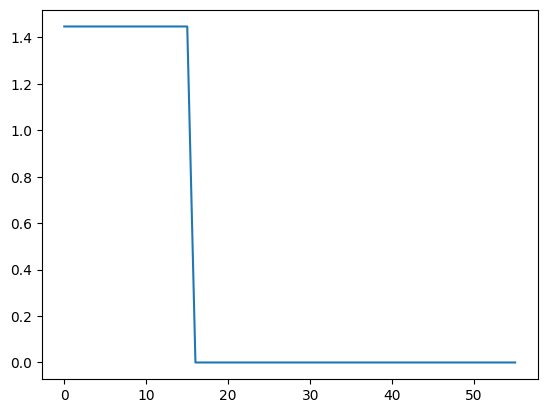

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s,win): #s,w,win,up/down
    if win:
        return lead+2*distance
    return max(s-1,0)

w=100  #fixed for now, or else must go to state
T=1000
lead=15 #fixed for now, or else when generating a project, generate random leads.
Arrivalprob=0.3 #i can also randomize it
distance=20
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} #value function of (t,s)  :time period, state (later state will also have w)
P={} #policy    (later state will also have w )

for s in States:
    V[(T,s)]=0

for t in range(T-1,-1,-1):
    for s in States:        
        bestvalue=0
        if s>lead: #not eligible to bid
            V[(t,s)]=V[(t+1,stateTransition(s,0))]
            P[(t,s)]=0
            continue
        for a in actions:
            #expected opportunity cost in the presense of w that will randomly change
            opportunityCost=V[(t+1,stateTransition(s,0))]-V[(t+1,stateTransition(s,1))]
            value=V[(t+1,stateTransition(s,0))]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
            #instead of value compute expected value, e.g., average over all possible W_{t+1}
            if value>=bestvalue:
                bestvalue=value
                V[t,s]=value
                P[t,s]=a
        


ts=np.arange(0,1000)
plt.plot(States,[P[10,s] for s in States])


In [8]:
actions

array([0.5       , 0.57894737, 0.65789474, 0.73684211, 0.81578947,
       0.89473684, 0.97368421, 1.05263158, 1.13157895, 1.21052632,
       1.28947368, 1.36842105, 1.44736842, 1.52631579, 1.60526316,
       1.68421053, 1.76315789, 1.84210526, 1.92105263, 2.        ])

# Base Code

## W can increment only with steps of 1

In [12]:
import numpy as np

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, w, distance): 
    if win:
        return lead + 2*distance
    return max(s-1,0)

def update_w(w):
    if np.random.rand() < abs(w - 100) / 100.0:
        return w - 1 if w > 100 else w + 1
    else:
        return w + 1 if w > 100 else w - 1

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

w_values = np.arange(50, 200, 1)  # possible values for w

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} 
P={} 

for s in States:
    for w in w_values:
        V[(T,s,w)]=0

for t in range(T-1,-1,-1):
    for s in States: 
        for w in w_values:
            w_updated = update_w(w)
            w_updated = find_closest(w_values, w_updated)
            bestvalue=0
            if s>lead: 
                V[(t,s,w)]=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]
                P[(t,s,w)]=0
                continue
            for a in actions:
                opportunityCost=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]-V[(t+1,stateTransition(s,1, w_updated, distance), w_updated)]
                value=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
                if value>=bestvalue:
                    bestvalue=value
                    V[(t,s,w)]=value
                    P[(t,s,w)]=a



## Variable steps for W no bounds

In [13]:
import numpy as np

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, w, distance): 
    if win:
        return lead + 2*distance
    return max(s-1,0)

def update_w(w):
    step_sizes = np.array([1, 3, 5])
    probabilities = np.array([0.5, 0.3, 0.2])
    step_size = np.random.choice(step_sizes, p=probabilities)

    if np.random.rand() < abs(w - 100) / 100.0:
        return w - step_size if w > 100 else w + step_size
    else:
        return w + step_size if w > 100 else w - step_size


def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

w_values = np.arange(0, 400)  # possible values for w, might need to fix this

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} 
P={} 

for s in States:
    for w in w_values:
        V[(T,s,w)]=0

for t in range(T-1,-1,-1):
    for s in States: 
        for w in w_values:
            w_updated = update_w(w)
            w_updated = find_closest(w_values, w_updated)
            bestvalue=0
            if s>lead: 
                V[(t,s,w)]=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]
                P[(t,s,w)]=0
                continue
            for a in actions:
                opportunityCost=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]-V[(t+1,stateTransition(s,1, w_updated, distance), w_updated)]
                value=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
                if value>=bestvalue:
                    bestvalue=value
                    V[(t,s,w)]=value
                    P[(t,s,w)]=a

## Variable steps for W with bounds

In [14]:
import numpy as np

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, w, distance): 
    if win:
        return lead + 2*distance
    return max(s-1,0)

def update_w(w):
    step_sizes = np.array([1, 3, 5])
    probabilities = np.array([0.5, 0.3, 0.2])
    step_size = np.random.choice(step_sizes, p=probabilities)

    if np.random.rand() < abs(w - 100) / 100.0:
        return max(w - step_size, 50) if w > 100 else min(w + step_size, 200)
    else:
        return min(w + step_size, 200) if w > 100 else max(w - step_size, 50)
    
def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

w_values = np.arange(50, 200)  # possible values for w

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} 
P={} 

for s in States:
    for w in w_values:
        V[(T,s,w)]=0

for t in range(T-1,-1,-1):
    for s in States: 
        for w in w_values:
            w_updated = update_w(w)
            w_updated = find_closest(w_values, w_updated)
            bestvalue=0
            if s>lead: 
                V[(t,s,w)]=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]
                P[(t,s,w)]=0
                continue
            for a in actions:
                opportunityCost=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]-V[(t+1,stateTransition(s,1, w_updated, distance), w_updated)]
                value=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
                if value>=bestvalue:
                    bestvalue=value
                    V[(t,s,w)]=value
                    P[(t,s,w)]=a


# 2 Vessels

In [15]:
import numpy as np

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, w, distance): 
    if win:
        return lead + 2*distance
    return max(s-1,0)

def update_w(w):
    step_sizes = np.array([1, 3, 5])
    probabilities = np.array([0.5, 0.3, 0.2])
    step_size = np.random.choice(step_sizes, p=probabilities)

    if np.random.rand() < abs(w - 100) / 100.0:
        return max(w - step_size, 50) if w > 100 else min(w + step_size, 200)
    else:
        return min(w + step_size, 200) if w > 100 else max(w - step_size, 50)
    
def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

w_values = np.arange(50, 200)  # possible values for w

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} 
P={} 

for s1 in States:
    for s2 in States:
        for w in w_values:
            V[(T,s1,s2,w)]=0

for t in range(T-1,-1,-1):
    for s1 in States: 
        for s2 in States:
            for w in w_values:
                w_updated = update_w(w)
                w_updated = find_closest(w_values, w_updated)
                bestvalue=0
                if s1>lead and s2>lead: 
                    V[(t,s1,s2,w)]=V[(t+1,stateTransition(s1,0, w_updated, distance),stateTransition(s2,0, w_updated, distance), w_updated)]
                    P[(t,s1,s2,w)]=0
                    continue
                for a in actions:
                    opportunityCost=V[(t+1,stateTransition(s1,0, w_updated, distance),stateTransition(s2,0, w_updated, distance), w_updated)]-V[(t+1,stateTransition(s1,1, w_updated, distance),stateTransition(s2,1, w_updated, distance), w_updated)]
                    value=V[(t+1,stateTransition(s1,0, w_updated, distance),stateTransition(s2,0, w_updated, distance), w_updated)]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
                    if value>=bestvalue:
                        bestvalue=value
                        V[(t,s1,s2,w)]=value
                        P[(t,s1,s2,w)]=a


KeyboardInterrupt: 

# 2 Destination Ports

# 2 Vessels 2 Destination Ports

# Full Code